In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

In [3]:
class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
        
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
                
        temp = ( A - self.Y.T )        
        temp = np.reshape( temp, self.r )
        
        dW = np.dot( self.X.T, temp ) / self.r         
        db = np.sum( temp ) / self.r  
        
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db                  
          
        return self 
    
    def fit( self, X, Y ) :                
        self.r, self.c = X.shape                
        self.W = np.zeros( self.c )        
        self.b = 0        
        self.X = X        
        self.Y = Y
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
       
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y

In [4]:
def main() :
         
    data = pd.read_csv( "diabetes2.csv" )
    X = data.iloc[:,:-1].values
    Y = data.iloc[:,-1:].values
      
    X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size = 0.20, random_state = 0 )
          
    model = LogitRegression( learning_rate = 0.01, iterations = 100000 )
      
    model.fit( X_train, Y_train )    
    
    Y_pred = model.predict( X_test )
             
    correctly_classified = 0      
         
    total = 0    
    for total in range( np.size( Y_pred ) ) :  
        
        if Y_test[total] == Y_pred[total] :            
            correctly_classified = correctly_classified + 1                 
        total = total + 1          
    print( "Accuracy :  ", ( correctly_classified / total ) * 100 )
  
  
if __name__ == "__main__" :     
    main()

Accuracy :   70.12987012987013


In [5]:
data = pd.read_csv('diabetes2.csv')
data.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Pregnancies,6.000,1.000,8.000,1.000,0.000,5.000,3.000,10.000,2.000,8.000
Glucose,148.000,85.000,183.000,89.000,137.000,116.000,78.000,115.000,197.000,125.000
BloodPressure,72.000,66.000,64.000,66.000,40.000,74.000,50.000,0.000,70.000,96.000
SkinThickness,35.000,29.000,0.000,23.000,35.000,0.000,32.000,0.000,45.000,0.000
Insulin,0.000,0.000,0.000,94.000,168.000,0.000,88.000,0.000,543.000,0.000
BMI,33.600,26.600,23.300,28.100,43.100,25.600,31.000,35.300,30.500,0.000
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134,0.158,0.232
Age,50.000,31.000,32.000,21.000,33.000,30.000,26.000,29.000,53.000,54.000
Outcome,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000


In [6]:
data.columns = map(str.lower, data.columns)
data.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

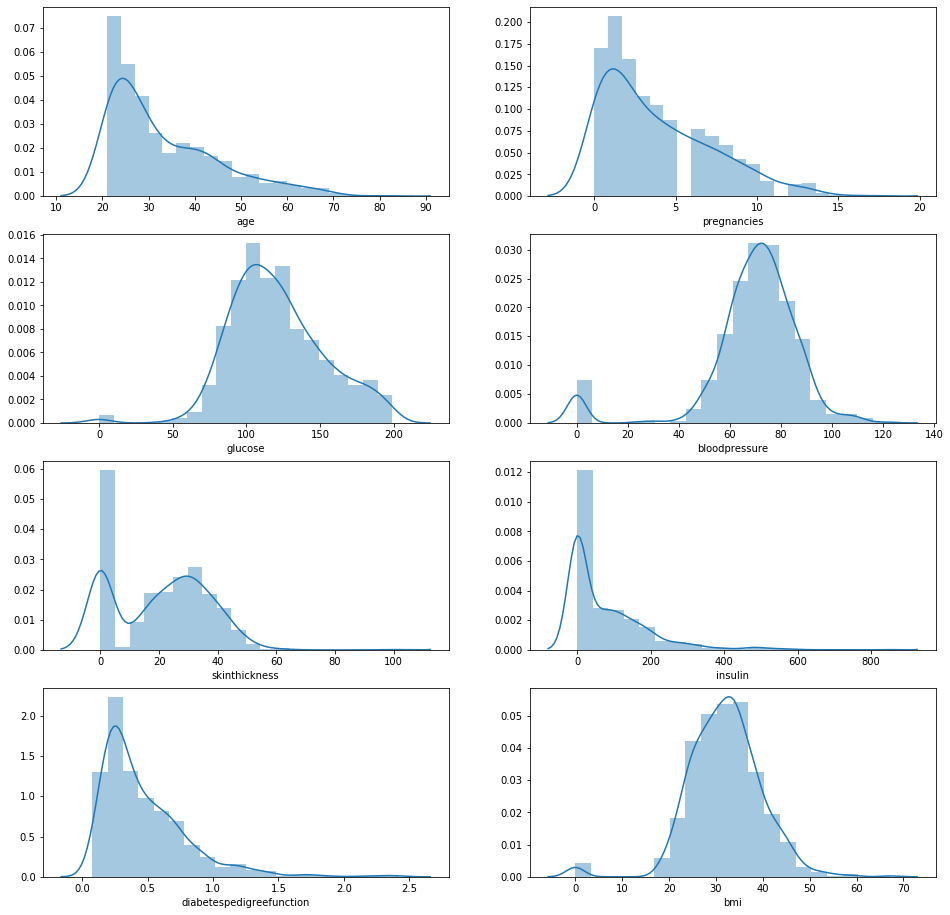

In [7]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(data.age, bins = 20, ax=ax[0,0]) 
sns.distplot(data.pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(data.glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(data.bloodpressure, bins = 20, ax=ax[1,1]) 
sns.distplot(data.skinthickness, bins = 20, ax=ax[2,0])
sns.distplot(data.insulin, bins = 20, ax=ax[2,1])
sns.distplot(data.diabetespedigreefunction, bins = 20, ax=ax[3,0]) 
sns.distplot(data.bmi, bins = 20, ax=ax[3,1]) 

                          pregnancies   glucose  bloodpressure  skinthickness  \
pregnancies                  1.000000  0.129459       0.141282      -0.081672   
glucose                      0.129459  1.000000       0.152590       0.057328   
bloodpressure                0.141282  0.152590       1.000000       0.207371   
skinthickness               -0.081672  0.057328       0.207371       1.000000   
insulin                     -0.073535  0.331357       0.088933       0.436783   
bmi                          0.017683  0.221071       0.281805       0.392573   
diabetespedigreefunction    -0.033523  0.137337       0.041265       0.183928   
age                          0.544341  0.263514       0.239528      -0.113970   
outcome                      0.221898  0.466581       0.065068       0.074752   

                           insulin       bmi  diabetespedigreefunction  \
pregnancies              -0.073535  0.017683                 -0.033523   
glucose                   0.331357  0.221

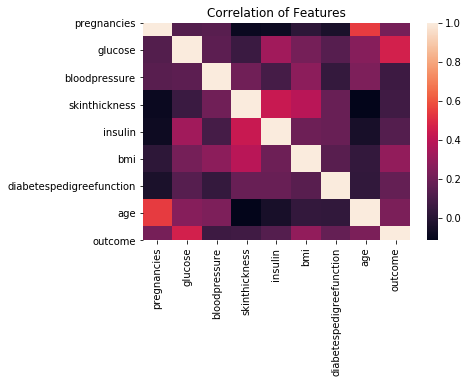

In [8]:
print(data.corr())
sns.heatmap(data.corr())
plt.title('Correlation of Features');